#### Transformada Discreta do Cosseno - DCT

1. Aplicação da transformada do cosseno unidimensional sobre vetor com 128 componentes. 

	A - Função de entrada apresentação alta correlação;

	B - Resultado da transformada, com grande concentração de energia em regiões próximas à origem.

2. Representações gráficas do núcleo da transformada discreta do cosseno DCT para um vetor de entrada com oito componentes.

3. Aplicação da DCT em blocos composto de 64 X 64 pixels.

	A - imagem original 

	B - resultado da Transformada Discreta do Cosseno - DCT

	C - espectro mantendo apenas os coeficiente em um raio de 8 pixels da origem;

	D - transformada inversa dos coeficiente em um raio de 8 pixels da origem

	E - espectro mantendo apenas os coeficiente em um raio de 16 pixels da origem;
	
	F - transformada inversa do os coeficiente em um raio de 16 pixels da origem

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.fftpack import dct, idct
import cv2

In [3]:
# Vetor de entrada com alta correlação (ex: seno)
n = 128
x = np.sin(np.linspace(0, 3 * np.pi, n))

# Aplicando a DCT
X_dct = dct(x, norm='ortho')

# Exibindo os primeiros valores da DCT (concentração de energia)
print(X_dct[:10])

[ 2.38099359e+00  5.83216796e-20  5.98588063e+00 -2.44352363e-15
 -4.48719183e+00  2.18248435e-16 -1.14515988e+00  8.63323394e-17
 -5.60260983e-01  2.12676387e-16]


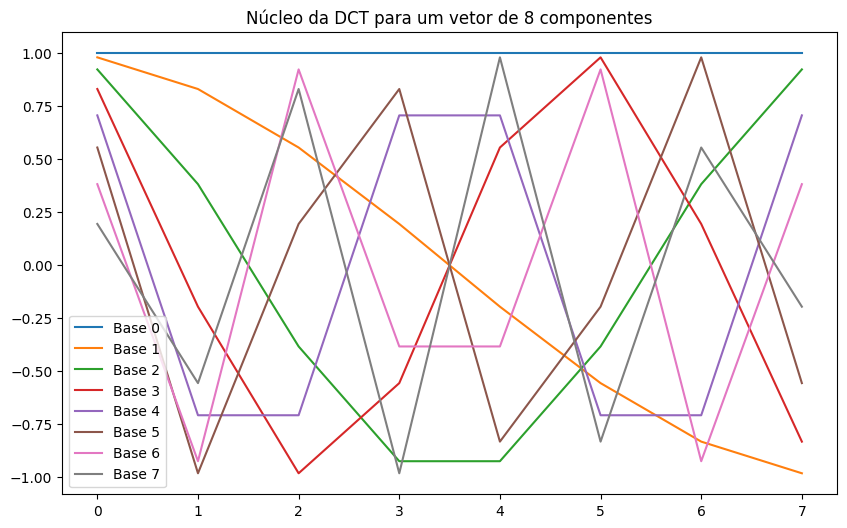

In [5]:
# Funções base da DCT (núcleo)
n = 8
N = np.arange(n)
basis = np.zeros((n, n))

for k in range(n):
    basis[k] = np.cos(np.pi * k * (2 * N + 1) / (2 * n))

# Visualizando o núcleo da DCT
plt.figure(figsize=(10, 6))
for i in range(n):
    plt.plot(basis[i], label=f'Base {i}')
plt.legend()
plt.title("Núcleo da DCT para um vetor de 8 componentes")
plt.show()

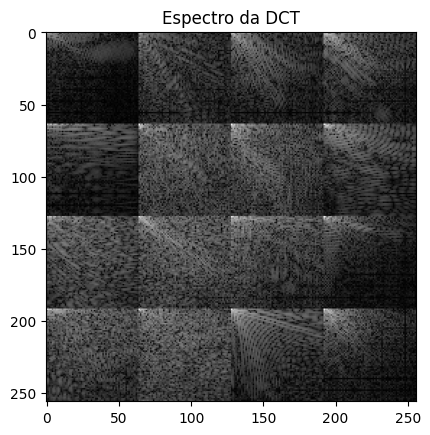

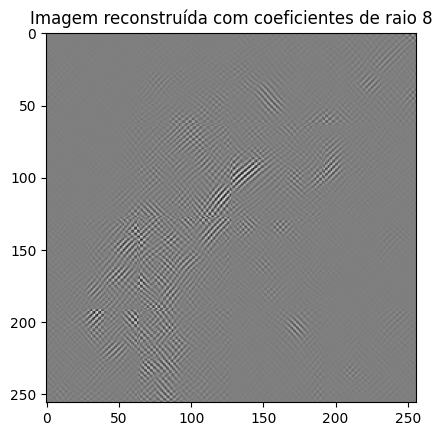

In [9]:
# Função para aplicar DCT 2D
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Função para aplicar IDCT 2D
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Carregando a imagem e convertendo para escala de cinza
img = cv2.imread('lena256.jpg', cv2.IMREAD_GRAYSCALE)
h, w = img.shape

# Aplicando DCT em blocos de 64x64
block_size = 64
dct_blocks = np.zeros_like(img, dtype=float)

for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        block = img[i:i+block_size, j:j+block_size]
        dct_blocks[i:i+block_size, j:j+block_size] = dct2(block)

# Visualizando o espectro da DCT
plt.imshow(np.log(np.abs(dct_blocks) + 1), cmap='gray')
plt.title('Espectro da DCT')
plt.show()

# Mantendo apenas os coeficientes dentro de um raio de 8 pixels
def apply_mask(dct_block, radius):
    center = block_size // 2
    mask = np.zeros_like(dct_block)
    for x in range(block_size):
        for y in range(block_size):
            if np.sqrt((x - center)**2 + (y - center)**2) <= radius:
                mask[x, y] = 1
    return dct_block * mask

# Aplicando a máscara para um raio de 8 pixels
masked_blocks = np.zeros_like(dct_blocks)
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        masked_blocks[i:i+block_size, j:j+block_size] = apply_mask(dct_blocks[i:i+block_size, j:j+block_size], 8)

# Transformada inversa com os coeficientes mascarados
reconstructed = np.zeros_like(img, dtype=float)
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        reconstructed[i:i+block_size, j:j+block_size] = idct2(masked_blocks[i:i+block_size, j:j+block_size])

# Visualizando a imagem reconstruída
plt.imshow(reconstructed, cmap='gray')
plt.title('Imagem reconstruída com coeficientes de raio 8')
plt.show()

In [16]:
# Abrindo e convertendo a imagem para tons de cinza
imagem = Image.open('lena256.jpg')
imagem_cinza = imagem.convert('L')
matriz_imagem = np.array(imagem)

matriz_imagem.shape

(256, 256, 3)

In [20]:
# Abrindo e convertendo a imagem para tons de cinza
imagem = Image.open('lenna.jpg')
imagem_cinza = imagem.convert('L')  # Convertendo para tons de cinza
matriz_imagem_cinza = np.array(imagem_cinza)  # Convertendo para matriz numpy

# Verificando as dimensões da matriz
print(matriz_imagem_cinza.shape)

(512, 512)


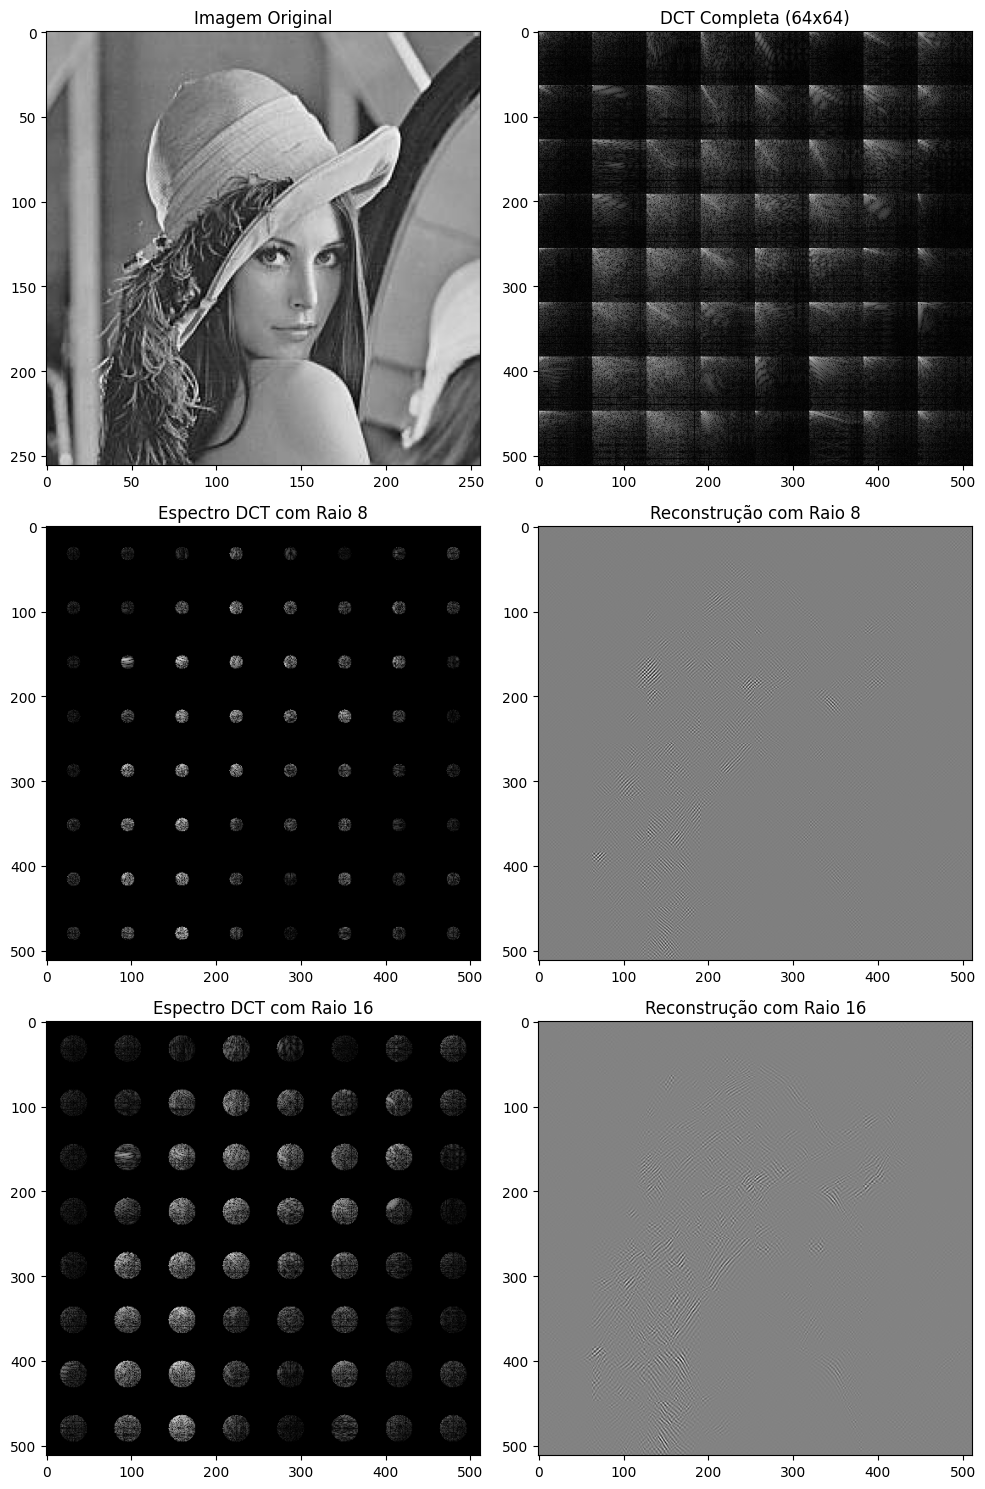

In [21]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
from PIL import Image
import matplotlib.pyplot as plt

# Funções de DCT e DCT inversa por blocos
def aplica_dct_por_blocos(imagem, bloco_tamanho=64):
    h, w = imagem.shape
    dct_blocos = np.zeros_like(imagem, dtype=np.float32)

    # Aplicando DCT por blocos
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = imagem[i:i+bloco_tamanho, j:j+bloco_tamanho]
            dct_blocos[i:i+bloco_tamanho, j:j+bloco_tamanho] = dct(dct(bloco.T, norm='ortho').T, norm='ortho')
    
    return dct_blocos

def mantem_coefs_raio(dct_img, raio, bloco_tamanho=64):
    h, w = dct_img.shape
    nova_dct = np.zeros_like(dct_img)
    
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            centro = bloco_tamanho // 2
            for u in range(bloco_tamanho):
                for v in range(bloco_tamanho):
                    if np.sqrt((u-centro)**2 + (v-centro)**2) <= raio:
                        nova_dct[i+u, j+v] = bloco[u, v]
    
    return nova_dct

def aplica_dct_inversa_por_blocos(dct_img, bloco_tamanho=64):
    h, w = dct_img.shape
    imagem_rec = np.zeros_like(dct_img, dtype=np.float32)

    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            imagem_rec[i:i+bloco_tamanho, j:j+bloco_tamanho] = idct(idct(bloco.T, norm='ortho').T, norm='ortho')
    
    return imagem_rec



# Aplicando DCT na imagem
dct_img = aplica_dct_por_blocos(matriz_imagem_cinza, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 8
dct_raio_8 = mantem_coefs_raio(dct_img, raio=8, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 8
imagem_coeficiente_8 = aplica_dct_inversa_por_blocos(dct_raio_8, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 16
dct_raio_16 = mantem_coefs_raio(dct_img, raio=16, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 16
imagem_coeficiente_16 = aplica_dct_inversa_por_blocos(dct_raio_16, bloco_tamanho=64)

# Exibindo as imagens
plt.figure(figsize=(10, 15))

# Linha 1 - Imagem original e DCT
plt.subplot(3, 2, 1)
plt.title('Imagem Original')
plt.imshow(matriz_imagem, cmap='gray')

plt.subplot(3, 2, 2)
plt.title('DCT Completa (64x64)')
plt.imshow(np.log(abs(dct_img) + 1), cmap='gray')  # Espectro da DCT

# Linha 2 - DCT com raio 8 e Inversa
plt.subplot(3, 2, 3)
plt.title('Espectro DCT com Raio 8')
plt.imshow(np.log(abs(dct_raio_8) + 1), cmap='gray')

plt.subplot(3, 2, 4)
plt.title('Reconstrução com Raio 8')
plt.imshow(imagem_coeficiente_8, cmap='gray')

# Linha 3 - DCT com raio 16 e Inversa
plt.subplot(3, 2, 5)
plt.title('Espectro DCT com Raio 16')
plt.imshow(np.log(abs(dct_raio_16) + 1), cmap='gray')

plt.subplot(3, 2, 6)
plt.title('Reconstrução com Raio 16')
plt.imshow(imagem_coeficiente_16, cmap='gray')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

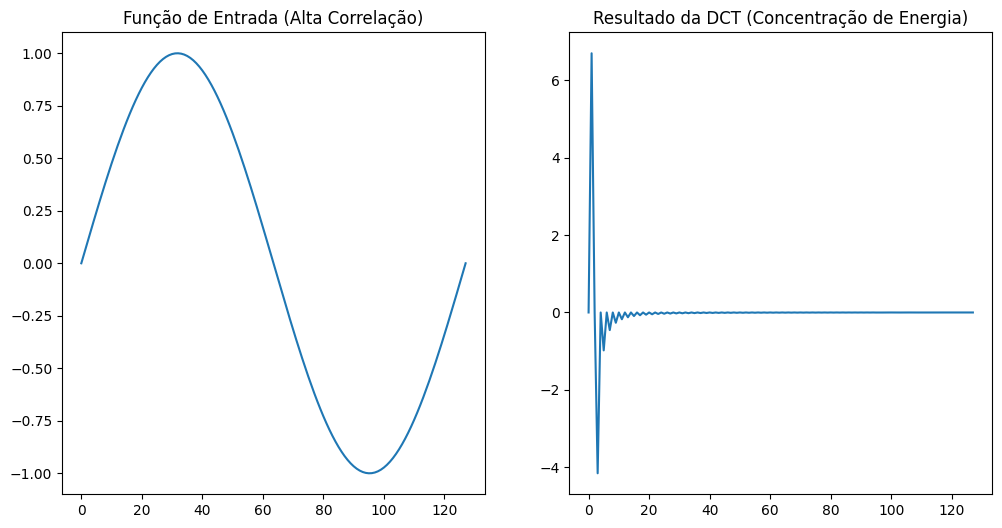

In [2]:
# Vetor com 128 componentes com alta correlação (ex: função senoidal)
n = 128
x = np.sin(np.linspace(0, 2 * np.pi, n))

# Aplicando a Transformada Discreta do Cosseno (DCT)
dct_x = dct(x, norm='ortho')

# Exibindo o vetor original e a DCT
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x)
plt.title("Função de Entrada (Alta Correlação)")
plt.subplot(1, 2, 2)
plt.plot(dct_x)
plt.title("Resultado da DCT (Concentração de Energia)")
plt.show()

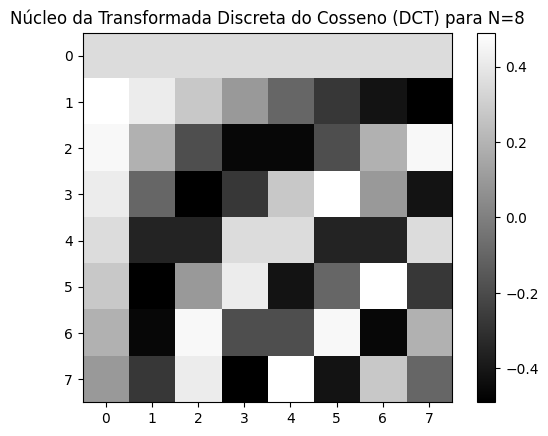

In [3]:
# Função para calcular a matriz DCT-2D para vetores com 8 componentes
def dct_kernel(N):
    kernel = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == 0:
                kernel[i, j] = 1 / np.sqrt(N)
            else:
                kernel[i, j] = np.sqrt(2/N) * np.cos(np.pi * i * (2*j + 1) / (2*N))
    return kernel

N = 8
kernel_dct = dct_kernel(N)

# Exibir o kernel da DCT
plt.imshow(kernel_dct, cmap='gray')
plt.title('Núcleo da Transformada Discreta do Cosseno (DCT) para N=8')
plt.colorbar()
plt.show()

Aplicação da DCT em blocos de 64 x 64 pixels

In [6]:
imagem = Image.open('lenna.jpg')
imagem_cinza = imagem.convert('L')  # Convertendo para tons de cinza
matriz_imagem_cinza = np.array(imagem_cinza)  # Convertendo para matriz numpy

# Verificando as dimensões da matriz
print(matriz_imagem_cinza.shape)

(512, 512)


C:\Users\luanf\AppData\Local\Temp\ipykernel_2144\1953497479.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(dct_imagem) + 1), cmap='gray')


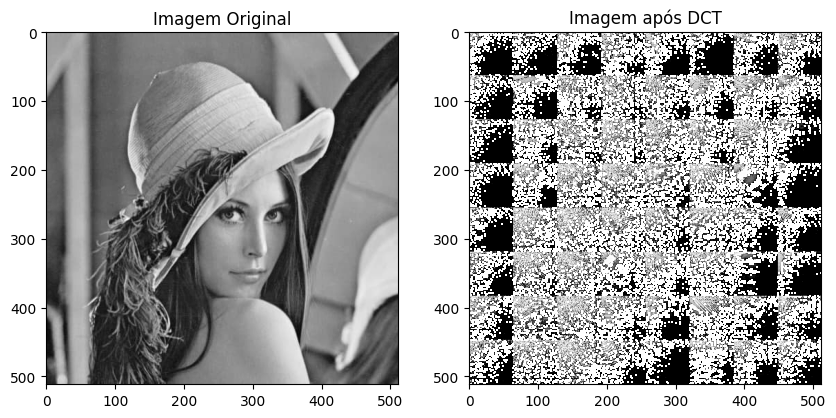

In [7]:
# Função para aplicar DCT 2D em blocos de 64x64
def aplica_dct_em_blocos(imagem, tamanho_bloco=64):
    altura, largura = imagem.shape
    dct_imagem = np.zeros_like(imagem)
    for i in range(0, altura, tamanho_bloco):
        for j in range(0, largura, tamanho_bloco):
            bloco = imagem[i:i+tamanho_bloco, j:j+tamanho_bloco]
            dct_bloco = dct(dct(bloco.T, norm='ortho').T, norm='ortho')  # DCT 2D
            dct_imagem[i:i+tamanho_bloco, j:j+tamanho_bloco] = dct_bloco
    return dct_imagem

# Aplicando DCT em blocos de 64x64
dct_imagem = aplica_dct_em_blocos(matriz_imagem_cinza)

# Exibir a imagem original e a imagem após a DCT
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(matriz_imagem_cinza, cmap='gray')
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(dct_imagem) + 1), cmap='gray')
plt.title("Imagem após DCT")
plt.show()

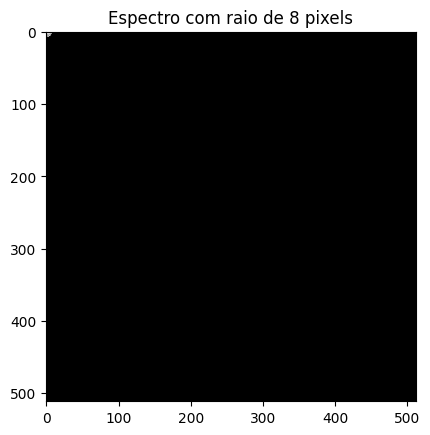

In [8]:
def aplica_filtro_raio(dct_imagem, raio):
    altura, largura = dct_imagem.shape
    centro_x, centro_y = altura // 2, largura // 2
    filtro_dct = np.zeros_like(dct_imagem)
    for i in range(altura):
        for j in range(largura):
            if np.sqrt(i**2 + j**2) <= raio:
                filtro_dct[i, j] = dct_imagem[i, j]
    return filtro_dct

# Aplicar filtro com raio de 8 pixels
dct_filtrada_8 = aplica_filtro_raio(dct_imagem, 8)

# Exibir espectro filtrado
plt.imshow(np.log(abs(dct_filtrada_8) + 1), cmap='gray')
plt.title("Espectro com raio de 8 pixels")
plt.show()


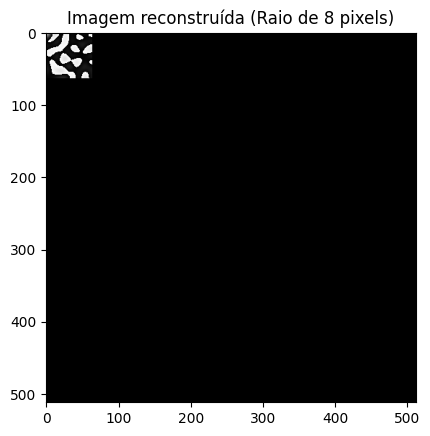

In [9]:
def aplica_idct_em_blocos(dct_imagem, tamanho_bloco=64):
    altura, largura = dct_imagem.shape
    imagem_reconstruida = np.zeros_like(dct_imagem)
    for i in range(0, altura, tamanho_bloco):
        for j in range(0, largura, tamanho_bloco):
            bloco_dct = dct_imagem[i:i+tamanho_bloco, j:j+tamanho_bloco]
            bloco_idct = idct(idct(bloco_dct.T, norm='ortho').T, norm='ortho')  # IDCT 2D
            imagem_reconstruida[i:i+tamanho_bloco, j:j+tamanho_bloco] = bloco_idct
    return imagem_reconstruida

# Reconstruindo a imagem com IDCT (usando apenas os coeficientes no raio de 8)
imagem_reconstruida_8 = aplica_idct_em_blocos(dct_filtrada_8)

# Exibir a imagem reconstruída
plt.imshow(imagem_reconstruida_8, cmap='gray')
plt.title("Imagem reconstruída (Raio de 8 pixels)")
plt.show()


C:\Users\luanf\AppData\Local\Temp\ipykernel_2144\3670138603.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(dct_filtrada_16) + 1), cmap='gray')


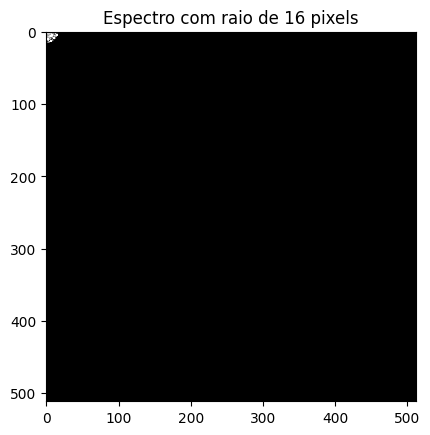

In [10]:
# Aplicar filtro com raio de 16 pixels
dct_filtrada_16 = aplica_filtro_raio(dct_imagem, 16)

# Exibir espectro filtrado
plt.imshow(np.log(abs(dct_filtrada_16) + 1), cmap='gray')
plt.title("Espectro com raio de 16 pixels")
plt.show()


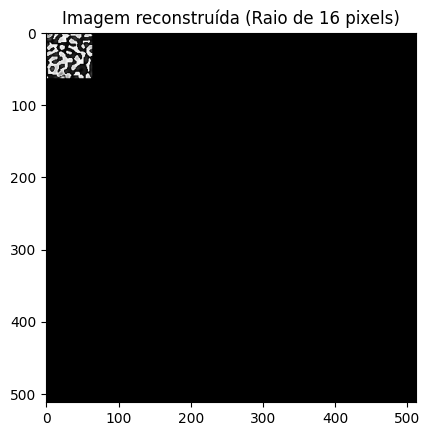

In [11]:
# Reconstruindo a imagem com IDCT (usando apenas os coeficientes no raio de 16)
imagem_reconstruida_16 = aplica_idct_em_blocos(dct_filtrada_16)

# Exibir a imagem reconstruída
plt.imshow(imagem_reconstruida_16, cmap='gray')
plt.title("Imagem reconstruída (Raio de 16 pixels)")
plt.show()


In [12]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# Funções de DCT e DCT inversa por blocos com melhorias
def aplica_dct_por_blocos(imagem, bloco_tamanho=64):
    h, w = imagem.shape
    dct_blocos = np.zeros_like(imagem, dtype=np.float32)

    # Aplicando DCT por blocos
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = imagem[i:i+bloco_tamanho, j:j+bloco_tamanho]
            dct_blocos[i:i+bloco_tamanho, j:j+bloco_tamanho] = dct(dct(bloco.T, norm='ortho').T, norm='ortho')
    
    return dct_blocos

def mantem_coefs_raio(dct_img, raio, bloco_tamanho=64):
    h, w = dct_img.shape
    nova_dct = np.zeros_like(dct_img)
    
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            centro = bloco_tamanho // 2
            for u in range(bloco_tamanho):
                for v in range(bloco_tamanho):
                    if np.sqrt((u-centro)**2 + (v-centro)**2) <= raio:
                        nova_dct[i+u, j+v] = bloco[u, v]
    
    return nova_dct

def aplica_dct_inversa_por_blocos(dct_img, bloco_tamanho=64):
    h, w = dct_img.shape
    imagem_rec = np.zeros_like(dct_img, dtype=np.float32)

    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            imagem_rec[i:i+bloco_tamanho, j:j+bloco_tamanho] = idct(idct(bloco.T, norm='ortho').T, norm='ortho')
    
    return imagem_rec

# Melhorando a visualização do espectro (ajustando a escala log)
def plot_espectro(dct_img, title):
    plt.imshow(np.log(abs(dct_img) + 1), cmap='hot')  # Mudando colormap para 'hot' para melhor visualização
    plt.title(title)
    plt.colorbar()
    plt.show()

# Agora vou testar estas melhorias na sua imagem


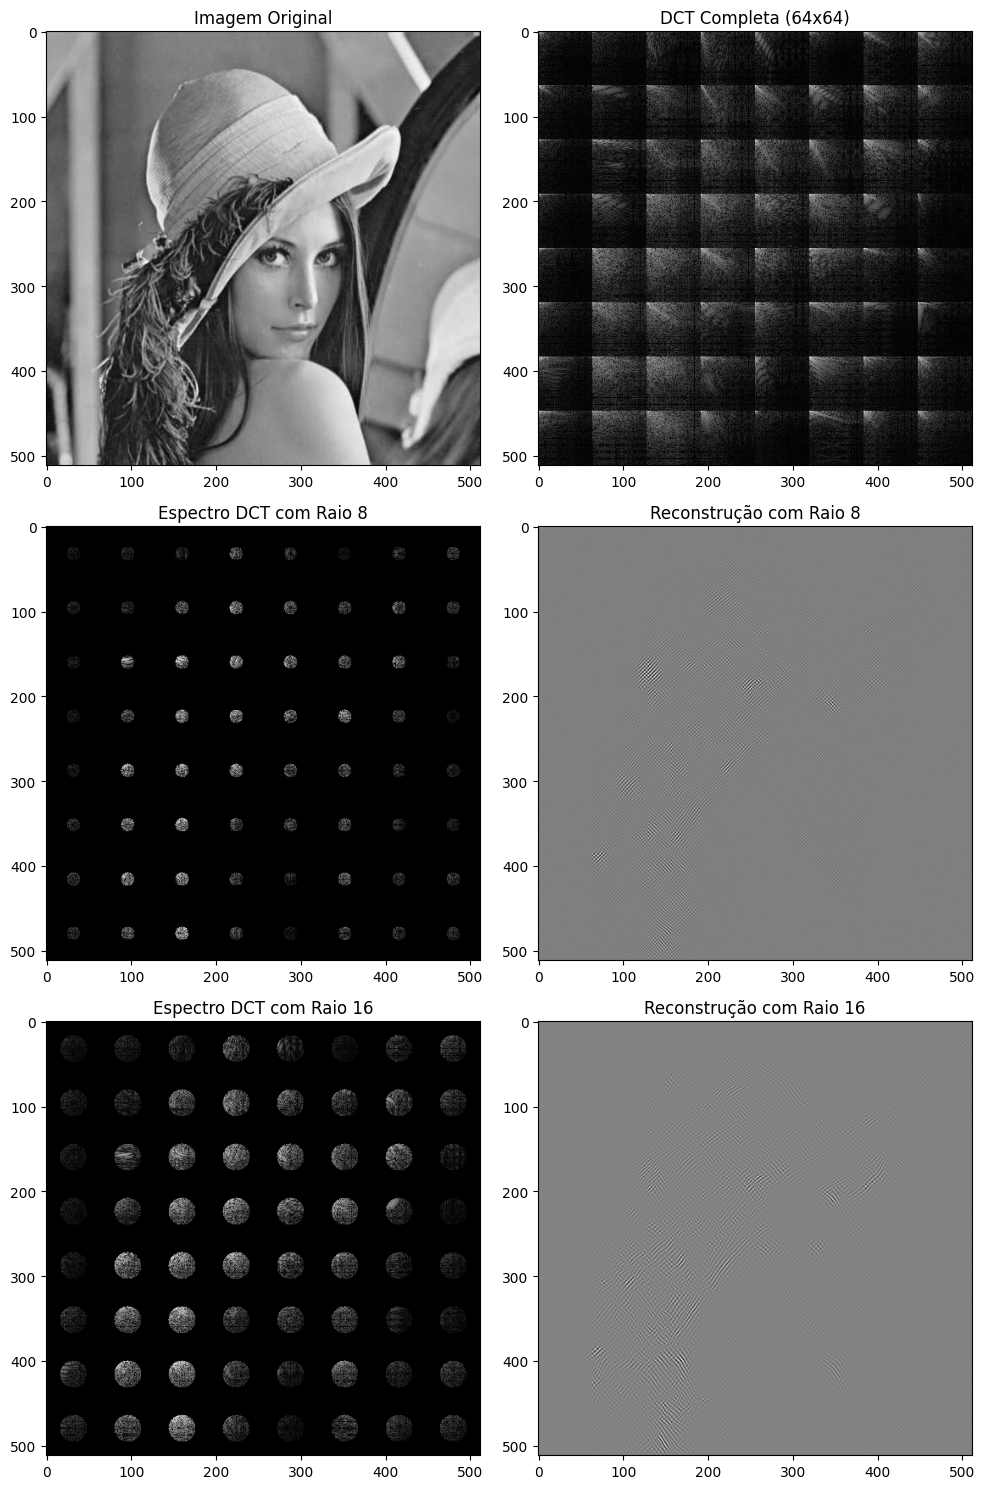

In [14]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image

# Funções de DCT e DCT inversa por blocos
def aplica_dct_por_blocos(imagem, bloco_tamanho=64):
    h, w = imagem.shape
    dct_blocos = np.zeros_like(imagem, dtype=np.float32)

    # Aplicando DCT por blocos
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = imagem[i:i+bloco_tamanho, j:j+bloco_tamanho]
            dct_blocos[i:i+bloco_tamanho, j:j+bloco_tamanho] = dct(dct(bloco.T, norm='ortho').T, norm='ortho')  # Corrigido aqui
    
    return dct_blocos

def mantem_coefs_raio(dct_img, raio, bloco_tamanho=64):
    h, w = dct_img.shape
    nova_dct = np.zeros_like(dct_img)
    
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            centro = bloco_tamanho // 2
            for u in range(bloco_tamanho):
                for v in range(bloco_tamanho):
                    if np.sqrt((u-centro)**2 + (v-centro)**2) <= raio:
                        nova_dct[i+u, j+v] = bloco[u, v]
    
    return nova_dct

def aplica_dct_inversa_por_blocos(dct_img, bloco_tamanho=64):
    h, w = dct_img.shape
    imagem_rec = np.zeros_like(dct_img, dtype=np.float32)

    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            imagem_rec[i:i+bloco_tamanho, j:j+bloco_tamanho] = idct(idct(bloco.T, norm='ortho').T, norm='ortho')
    
    return imagem_rec

# Carregando a imagem e convertendo para tons de cinza
imagem = Image.open('lenna.jpg').convert('L')
matriz_imagem = np.array(imagem)

# Aplicando a DCT na imagem por blocos de 64x64
dct_img = aplica_dct_por_blocos(matriz_imagem, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 8
dct_raio_8 = mantem_coefs_raio(dct_img, raio=8, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 8
imagem_coeficiente_8 = aplica_dct_inversa_por_blocos(dct_raio_8, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 16
dct_raio_16 = mantem_coefs_raio(dct_img, raio=16, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 16
imagem_coeficiente_16 = aplica_dct_inversa_por_blocos(dct_raio_16, bloco_tamanho=64)

# Exibindo as imagens e o espectro
plt.figure(figsize=(10, 15))

# Linha 1 - Imagem original e DCT completa
plt.subplot(3, 2, 1)
plt.title('Imagem Original')
plt.imshow(matriz_imagem, cmap='gray')

plt.subplot(3, 2, 2)
plt.title('DCT Completa (64x64)')
plt.imshow(np.log(abs(dct_img) + 1), cmap='gray')  # Espectro da DCT

# Linha 2 - Espectro com raio 8 e Reconstrução com raio 8
plt.subplot(3, 2, 3)
plt.title('Espectro DCT com Raio 8')
plt.imshow(np.log(abs(dct_raio_8) + 1), cmap='gray')

plt.subplot(3, 2, 4)
plt.title('Reconstrução com Raio 8')
plt.imshow(imagem_coeficiente_8, cmap='gray')

# Linha 3 - Espectro com raio 16 e Reconstrução com raio 16
plt.subplot(3, 2, 5)
plt.title('Espectro DCT com Raio 16')
plt.imshow(np.log(abs(dct_raio_16) + 1), cmap='gray')

plt.subplot(3, 2, 6)
plt.title('Reconstrução com Raio 16')
plt.imshow(imagem_coeficiente_16, cmap='gray')

plt.tight_layout()
plt.show()


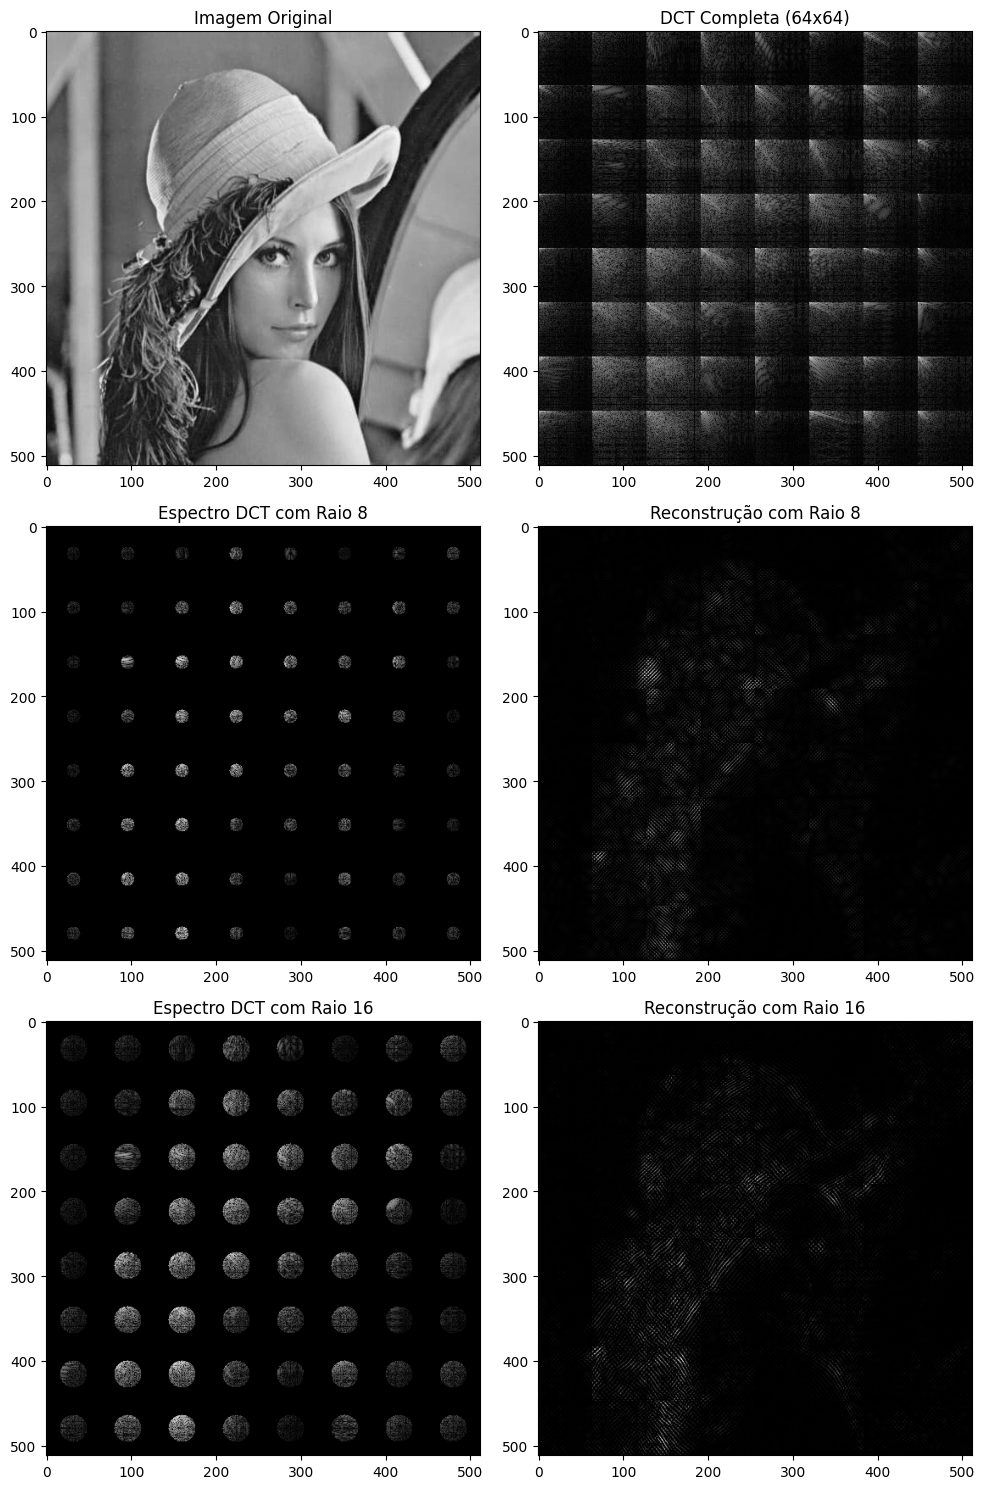

In [15]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
from PIL import Image

# Funções de DCT e DCT inversa por blocos
def aplica_dct_por_blocos(imagem, bloco_tamanho=64):
    h, w = imagem.shape
    dct_blocos = np.zeros_like(imagem, dtype=np.float32)

    # Aplicando DCT por blocos
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = imagem[i:i+bloco_tamanho, j:j+bloco_tamanho]
            dct_blocos[i:i+bloco_tamanho, j:j+bloco_tamanho] = dct(dct(bloco.T, norm='ortho').T, norm='ortho') 
    
    return dct_blocos

def mantem_coefs_raio(dct_img, raio, bloco_tamanho=64):
    h, w = dct_img.shape
    nova_dct = np.zeros_like(dct_img)
    
    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            centro = bloco_tamanho // 2
            for u in range(bloco_tamanho):
                for v in range(bloco_tamanho):
                    # Mantendo os coeficientes dentro do raio
                    if np.sqrt((u-centro)**2 + (v-centro)**2) <= raio:
                        nova_dct[i+u, j+v] = bloco[u, v]
    
    return nova_dct

def aplica_dct_inversa_por_blocos(dct_img, bloco_tamanho=64):
    h, w = dct_img.shape
    imagem_rec = np.zeros_like(dct_img, dtype=np.float32)

    for i in range(0, h, bloco_tamanho):
        for j in range(0, w, bloco_tamanho):
            bloco = dct_img[i:i+bloco_tamanho, j:j+bloco_tamanho]
            imagem_rec[i:i+bloco_tamanho, j:j+bloco_tamanho] = idct(idct(bloco.T, norm='ortho').T, norm='ortho')
    
    # Normalizando a imagem após DCT inversa
    imagem_rec = np.clip(imagem_rec, 0, 255)
    
    return imagem_rec

# Carregando a imagem e convertendo para tons de cinza
imagem = Image.open('lenna.jpg').convert('L')
matriz_imagem = np.array(imagem)

# Aplicando a DCT na imagem por blocos de 64x64
dct_img = aplica_dct_por_blocos(matriz_imagem, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 8
dct_raio_8 = mantem_coefs_raio(dct_img, raio=8, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 8
imagem_coeficiente_8 = aplica_dct_inversa_por_blocos(dct_raio_8, bloco_tamanho=64)

# Mantendo coeficientes dentro de um raio de 16
dct_raio_16 = mantem_coefs_raio(dct_img, raio=16, bloco_tamanho=64)
# Reconstruindo a imagem a partir da DCT com raio de 16
imagem_coeficiente_16 = aplica_dct_inversa_por_blocos(dct_raio_16, bloco_tamanho=64)

# Exibindo as imagens e o espectro
plt.figure(figsize=(10, 15))

# Linha 1 - Imagem original e DCT completa
plt.subplot(3, 2, 1)
plt.title('Imagem Original')
plt.imshow(matriz_imagem, cmap='gray')

plt.subplot(3, 2, 2)
plt.title('DCT Completa (64x64)')
plt.imshow(np.log(abs(dct_img) + 1), cmap='gray')  # Espectro da DCT

# Linha 2 - Espectro com raio 8 e Reconstrução com raio 8
plt.subplot(3, 2, 3)
plt.title('Espectro DCT com Raio 8')
plt.imshow(np.log(abs(dct_raio_8) + 1), cmap='gray')

plt.subplot(3, 2, 4)
plt.title('Reconstrução com Raio 8')
plt.imshow(imagem_coeficiente_8, cmap='gray')

# Linha 3 - Espectro com raio 16 e Reconstrução com raio 16
plt.subplot(3, 2, 5)
plt.title('Espectro DCT com Raio 16')
plt.imshow(np.log(abs(dct_raio_16) + 1), cmap='gray')

plt.subplot(3, 2, 6)
plt.title('Reconstrução com Raio 16')
plt.imshow(imagem_coeficiente_16, cmap='gray')

plt.tight_layout()
plt.show()
